# **Лабораторная работа №6**
## Вариант 1

## Загрузка данных

---

В качестве набора данных будем использовать [набор данных о ценах на золото за 2015-2021 год](https://www.kaggle.com/datasets/nisargchodavadiya/daily-gold-price-20152021-time-series)

Набор данных содержит следующие колонки:
+ Date - дата
+ Price - цена при закрытии торгов (окончательная цена) в указанную дату
+ Open - цена при открытии торгов в указанную дату
+ High - максимальная цена в указанную дату
+ Low - минимальная цена в указанную дату
+ Volume - проданный объем в указанную дату
+ Chg% - разница относительно старой цены в %

In [90]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from gplearn.genetic import SymbolicRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Загрузка датасета
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Gold Price.csv', header=0, index_col=0, parse_dates=True)

In [91]:
# Первые 5 строк датасета
dataset.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2014-01-01,29542,29435,29598,29340,2930,0.25
2014-01-02,29975,29678,30050,29678,3140,1.47
2014-01-03,29727,30031,30125,29539,3050,-0.83
2014-01-04,29279,29279,29279,29279,0,-1.51
2014-01-06,29119,29300,29395,29051,24380,-0.55


In [92]:
# Будем использовать в качестве временного ряда первые две колонки
time = dataset.copy()
time.drop(axis=1, columns=['Open', 'High', 'Low', 'Volume','Chg%'], inplace=True)

# Визуализация временного ряда и его основных характеристик

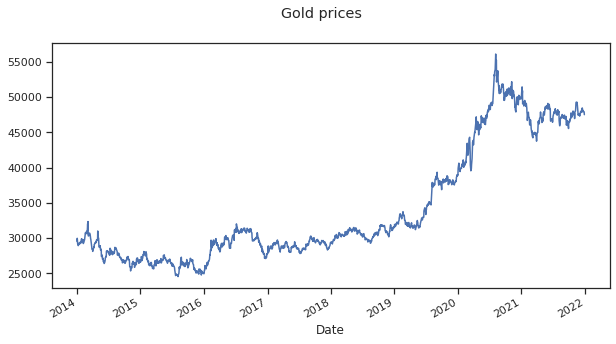

In [93]:
# Визуализация временного ряда в виде графика
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Gold prices')
time.plot(ax=ax, legend=False)
plt.show()

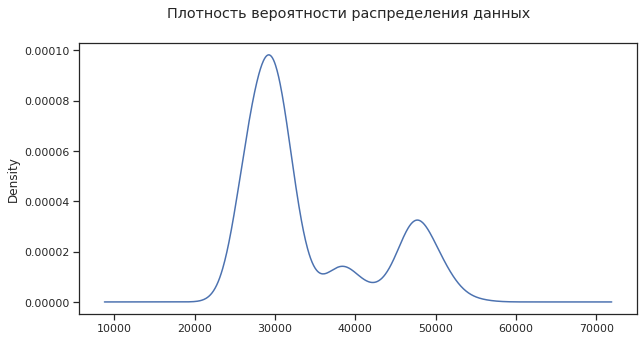

In [94]:
# График плотности вероятности
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
time.plot(ax=ax, kind='kde', legend=False)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


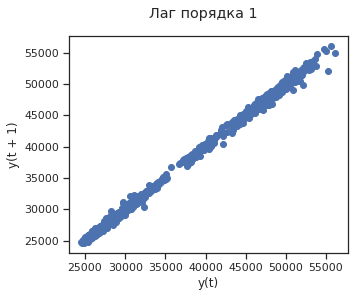

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


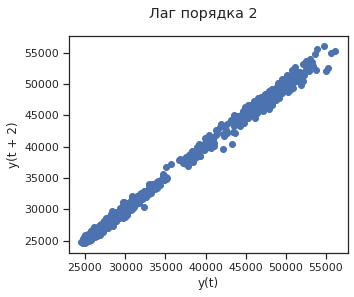

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


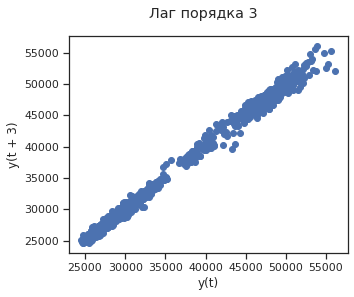

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


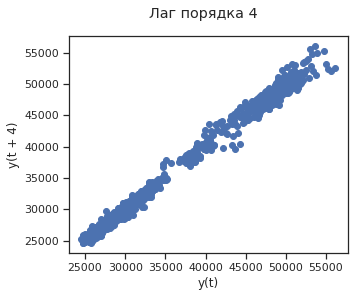

In [95]:
# Диаграмма лагов
for i in range(1, 5):
    fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(time, lag=i, ax=ax)
    plt.show()

Из диаграммы лагов можно сделать вывод, что имеет место положительная автокорреляция.

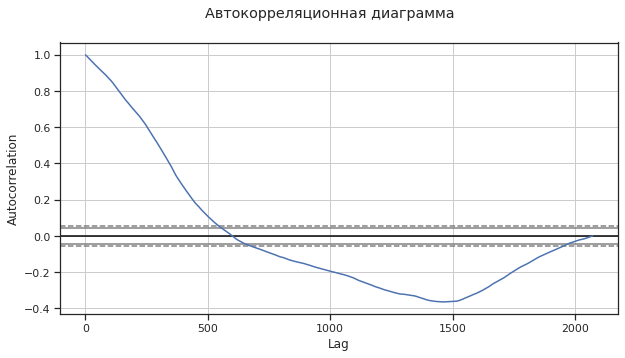

In [96]:
# Автокорреляционная диаграмма
# По оси Y откладывается ковариация 
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(time, ax=ax)
plt.show()

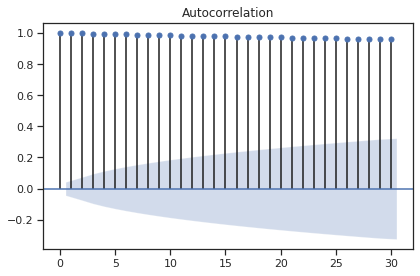

In [97]:
# Автокорреляционная функция
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(time, lags=30)
plt.tight_layout()

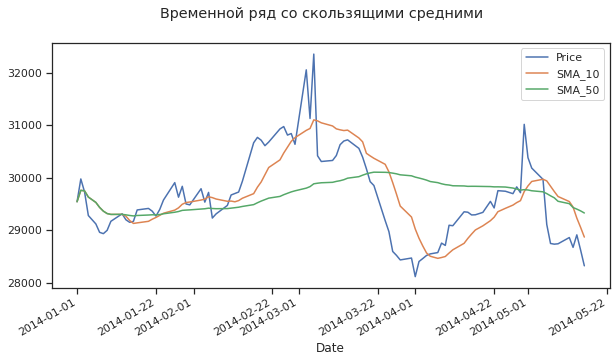

In [98]:
time2 = time.copy()
rmse = dict()
# Простое скользящее среднее (SMA)
time2['SMA_10'] = time2['Price'].rolling(10, min_periods=1).mean()
time2['SMA_50'] = time2['Price'].rolling(50, min_periods=1).mean()
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд со скользящими средними')
time2[:100].plot(ax=ax, legend=True)
plt.show()

# Разделение на обучающую и тестовую выборку

In [99]:
# Целочисленная метка шкалы времени 
xnum = list(range(time2.shape[0]))
# Разделение выборки на обучающую и тестовую
Y = time2['Price'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]
history_es = [x for x in train]

# Предсказание временного ряда

In [100]:
# Параметры модели (p,d,q) 
arima_order = (6,1,0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima[0])
    history_arima.append(test[t])
# Вычисление метрики RMSE
rmse['ARIMA'] = mean_squared_error(test, predictions_arima, squared=False)
print(rmse['ARIMA'])

445.7863760008655


In [101]:
# Формирование предсказаний
predictions_es = list()
for t in range(len(test)):
    model_es = ExponentialSmoothing(history_es)
    model_es_fit = model_es.fit()
    yhat_es = model_es_fit.forecast()[0]
    predictions_es.append(yhat_es)
    history_es.append(test[t])
# Вычисление метрики RMSE
rmse['HWES'] = mean_squared_error(test, predictions_es, squared=False)
print(rmse['HWES'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


444.75425457600875


In [102]:
# Записываем предсказания в DataFrame
time2['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)
time2['predictions_HWES'] = (train_size * [np.NAN]) + list(predictions_es)

# Визуализация тестовой выборки и прогнозов

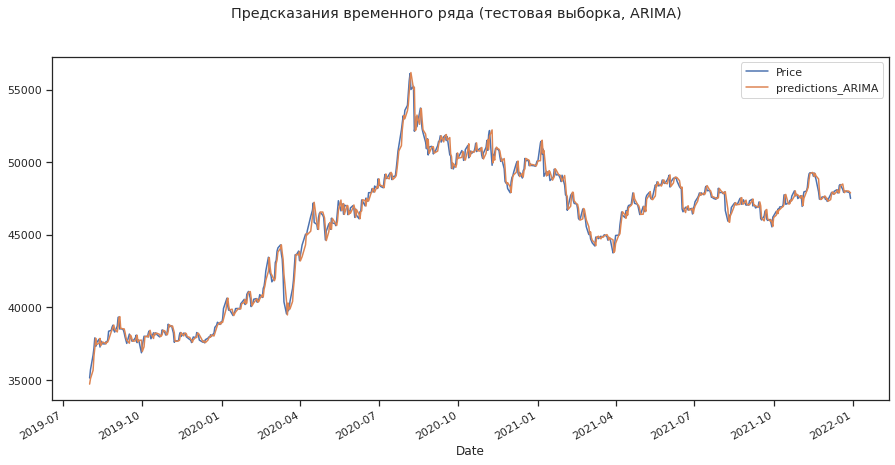

In [103]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,7))
fig.suptitle('Предсказания временного ряда (тестовая выборка, ARIMA)')
time2.iloc[train_size:][['Price','predictions_ARIMA']].plot(ax=ax, legend=True)
plt.show()

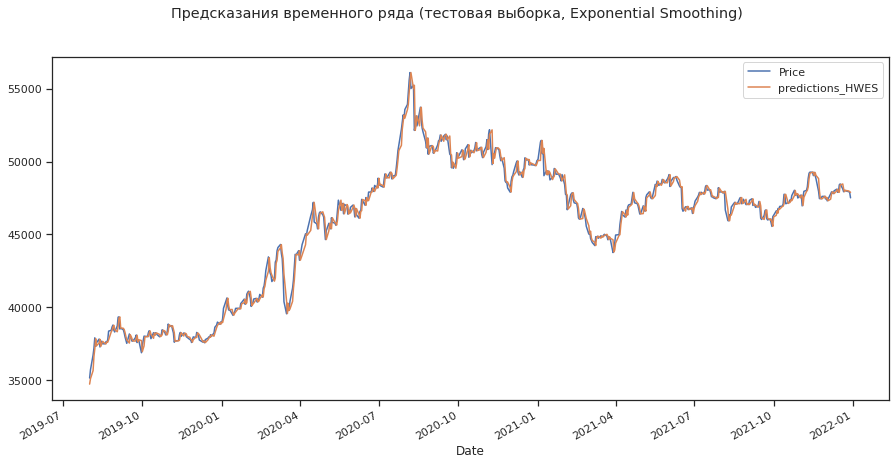

In [104]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,7))
fig.suptitle('Предсказания временного ряда (тестовая выборка, Exponential Smoothing)')
time2.iloc[train_size:][['Price','predictions_HWES']].plot(ax=ax, legend=True)
plt.show()

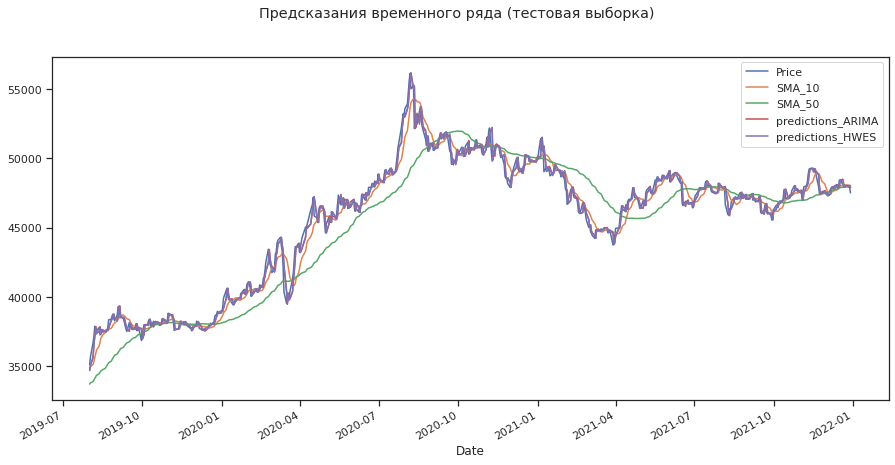

In [105]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,7))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
time2[train_size:].plot(ax=ax, legend=True)
plt.show()

# Оценка качества прогноза

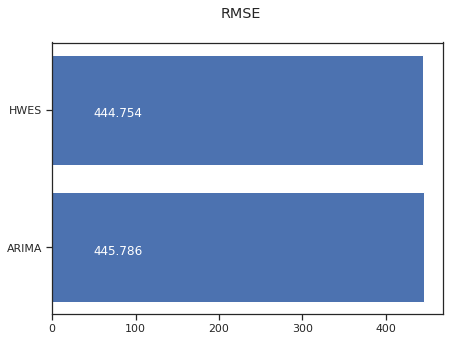

In [107]:
fig, ax = plt.subplots(figsize=(7,5))
fig.suptitle('RMSE')
ind = np.arange(len(rmse))
plt.barh(ind, rmse.values())
plt.yticks(ind, rmse)
# Вывод значений
for a,b in zip(ind, rmse.values()):
        plt.text(50, a-0.05, str(round(b,3)), color='white')
plt.show()